In [116]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
# reading data

titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test_cleaned.csv')

In [118]:
# checking shape

titanic_train.shape , titanic_test.shape

((891, 12), (418, 10))

In [119]:
# checking data information

titanic_train.info(), titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [120]:
#displaying few rows of train data

titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [121]:
#displaying few rows of test data

titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [122]:
# checking missing values

titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
# checking missing values 

titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [124]:
# checking missing percentage in train dataset

titanic_train.isnull().mean()  # since the percent of missing values is greater than 0.20, so we have two options whether to drop or impute missing values

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [125]:
# droping a column who has missing percentage more than 0.20 

titanic_train = titanic_train.drop(columns='Cabin')

In [126]:
# checking the column has dropped or not

titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [127]:
# filling missing values
# we have two options either use fillna() or sklearns' imputer class
# we will use fillna() to fill values

titanic_train.Age.fillna(titanic_train.Age.median(), inplace=True)

In [128]:
titanic_train.Embarked.mode()

0    S
dtype: object

In [129]:
titanic_train.Embarked.fillna(titanic_train.Embarked.mode()[0], inplace=True)

In [130]:
# checking all the values imputed or not

titanic_train.Age.isnull().sum(), titanic_train.Embarked.isnull().sum()

(0, 0)

In [131]:
# Again checking if there is any variable which have missing values

titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [132]:
# checking duplicates

titanic_train.duplicated().sum()

0

In [133]:
# now checking continous variables 

titanic_train.select_dtypes(include=['int64','float'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [134]:
titanic_train.select_dtypes(include='object')

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [135]:
titanic_train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [136]:
titanic_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1


#### EDA - Exploratory Data Analysis

In [137]:
# using describe()

titanic_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='Fare'>

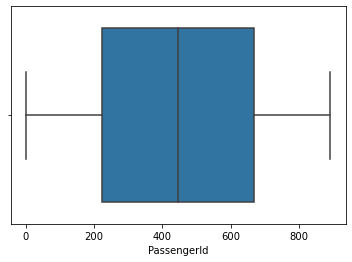

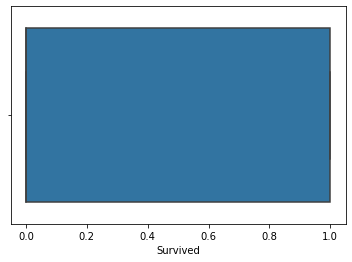

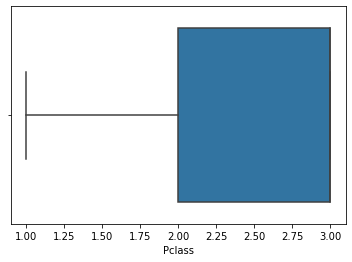

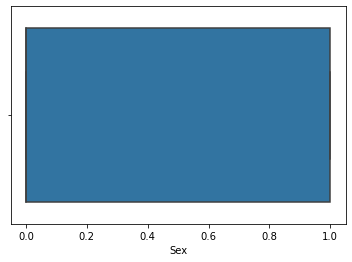

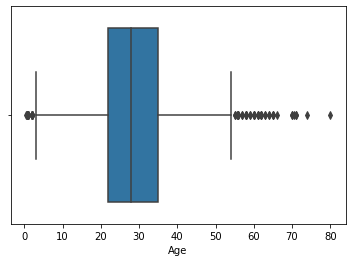

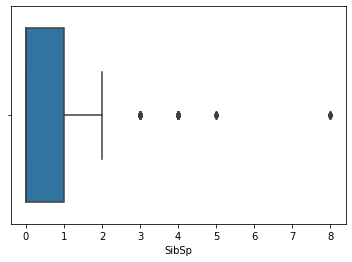

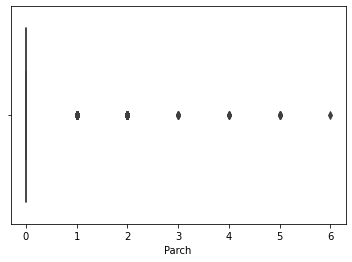

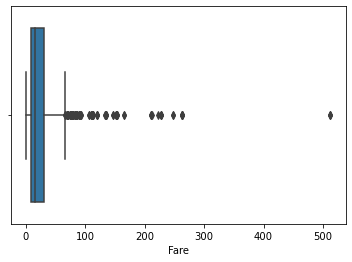

In [138]:
# checking outliers

sns.boxplot(titanic_train.PassengerId)
plt.subplots()
sns.boxplot(titanic_train.Survived)
plt.subplots()
sns.boxplot(titanic_train.Pclass)
plt.subplots()
sns.boxplot(titanic_train.Sex)
plt.subplots()
sns.boxplot(titanic_train.Age)
plt.subplots()
sns.boxplot(titanic_train.SibSp)
plt.subplots()
sns.boxplot(titanic_train.Parch)
plt.subplots()
sns.boxplot(titanic_train.Fare)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Fare', ylabel='Density'>

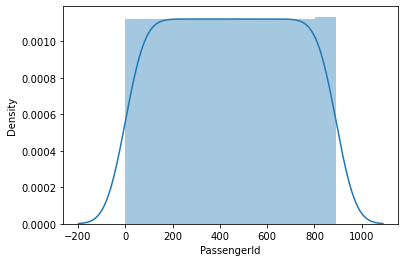

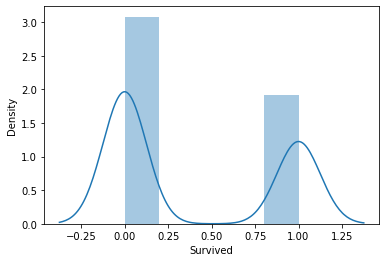

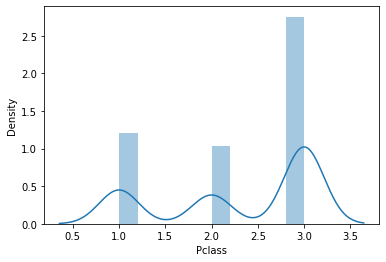

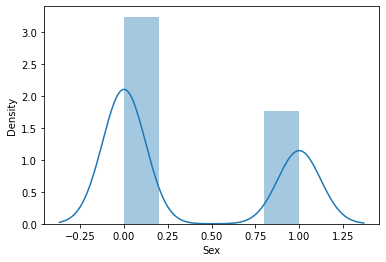

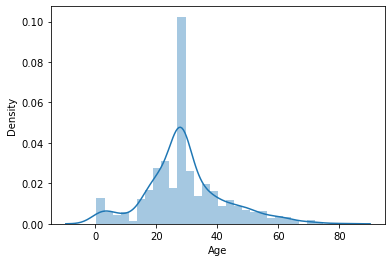

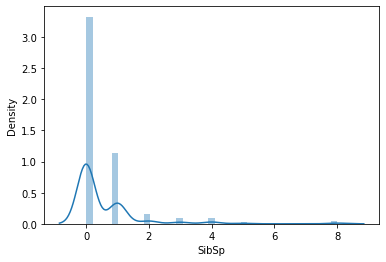

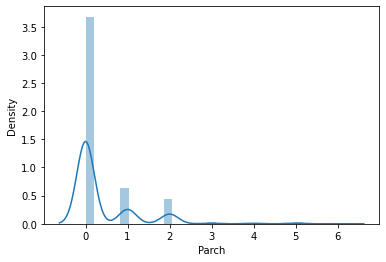

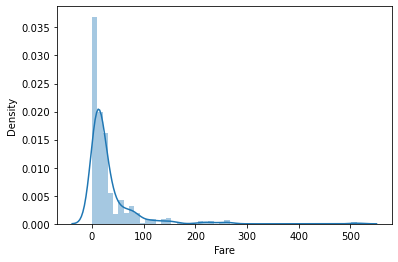

In [139]:
sns.distplot(titanic_train.PassengerId)
plt.subplots()
sns.distplot(titanic_train.Survived)
plt.subplots()
sns.distplot(titanic_train.Pclass)
plt.subplots()
sns.distplot(titanic_train.Sex)
plt.subplots()
sns.distplot(titanic_train.Age)
plt.subplots()
sns.distplot(titanic_train.SibSp)
plt.subplots()
sns.distplot(titanic_train.Parch)
plt.subplots()
sns.distplot(titanic_train.Fare)

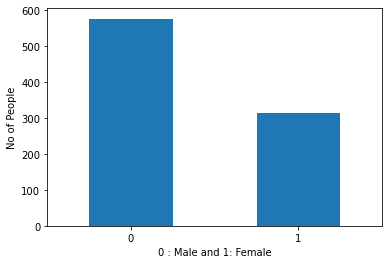

In [140]:
titanic_train.Sex.value_counts().plot(kind='bar')
plt.xlabel("0 : Male and 1: Female")
plt.ylabel("No of People")
plt.xticks(rotation=0);

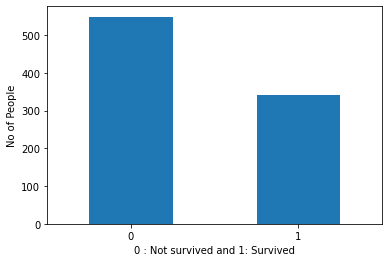

In [141]:
titanic_train.Survived.value_counts().plot(kind='bar')
plt.xlabel("0 : Not survived and 1: Survived")
plt.ylabel("No of People")
plt.xticks(rotation=0);

<AxesSubplot:>

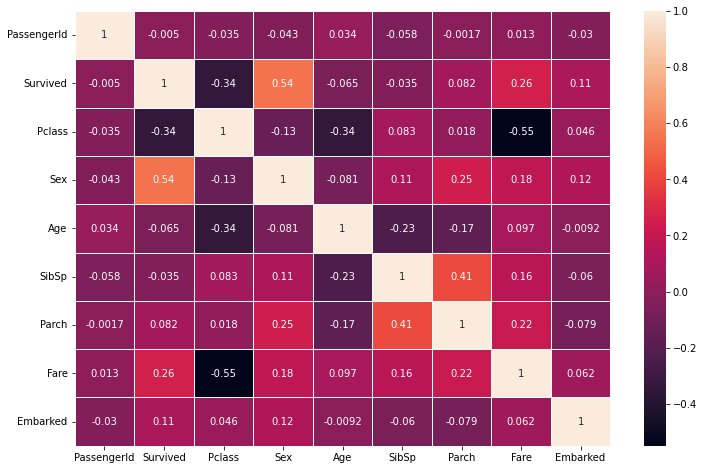

In [142]:
# checking correlation

plt.figure(figsize=(12,8))
sns.heatmap(titanic_train.corr(),annot=True,linewidths=1,linecolor='w')

##### Model Building

In [143]:
X = titanic_train.drop(columns = ['Name','Ticket','Survived'],axis=1)
y = titanic_train['Survived']

In [144]:
# importing library

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

In [145]:
# checking shape

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [146]:
# since this is a classification problem we use Logistic Regression
# importing skleran's logistic regression class

from sklearn.linear_model import LogisticRegression

In [147]:
lg = LogisticRegression()

In [148]:
lg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
# checking score

lg.score(X_test, y_test)

0.8379888268156425

In [150]:
# predict the value

pred = lg.predict(X_test)

In [151]:
# checking accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8379888268156425

In [152]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [153]:
# same doing with test data 

titanic_test.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [154]:
titanic_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0


In [155]:
titanic_test = titanic_test[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

In [156]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [157]:
test_pred = lg.predict(titanic_test)

In [158]:
df = {'PassengerId':titanic_test['PassengerId'], 'Survived':test_pred}

In [159]:
validation = pd.DataFrame(df)

In [161]:
validation.to_csv('submission.csv', index=False)